# Week 2 - Implementation of Shaffer et al

**Due January 25 at 8 PM**

In [439]:
# This line tells matplotlib to include plots here
% matplotlib inline
import numpy as np # We'll need numpy later
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt # This lets us access the pyplot functions
plt.style.use("ggplot")

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In numpy this is a random number generator whose numbers will be chosen from the desired normal distribution by using the call `np.random.normal(loc=mu, scale=sigma, size=(n, ))`. Sample from this normal distribution from n=1 to 50 (I.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

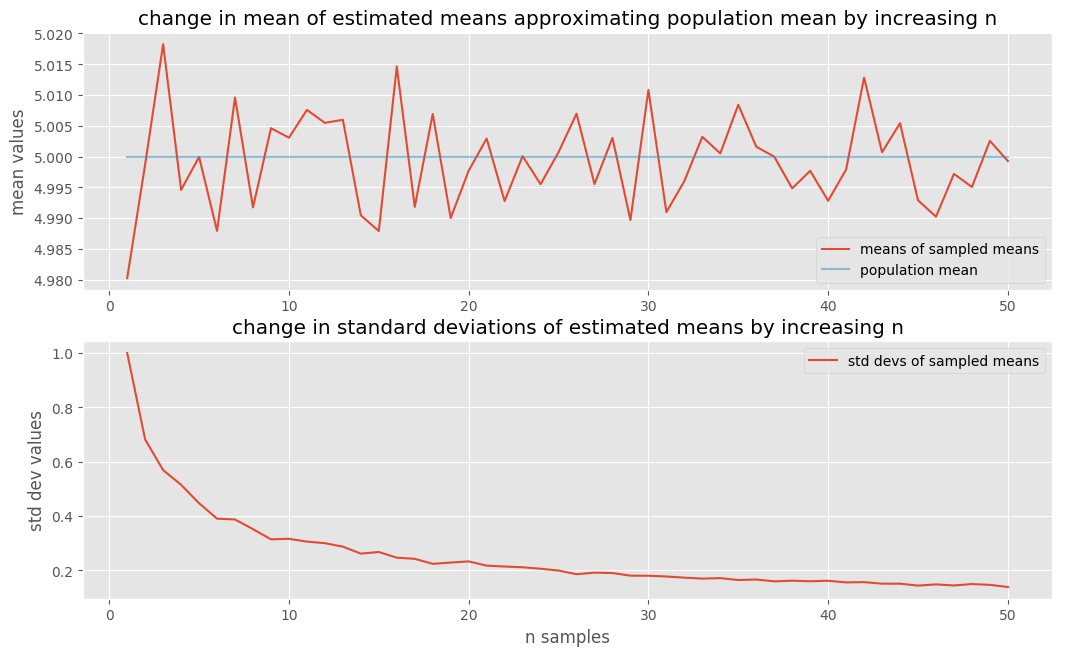

In [440]:
x_axis_50 = np.arange(1,51)

mu_1, sigma_1 = 5, 1

array_of_list_of_sampled_means = []

for n in range(50):
    nth_column_of_means = []
    for i in range(1000):
        X = np.random.normal(loc=mu_1, scale=sigma_1, size=(n+1,))
        nth_column_of_means.append(np.mean(X))
    
    array_of_list_of_sampled_means.append(nth_column_of_means)

list_of_means_of_sampled_means = []
list_of_stds_of_sampled_means = []
for n in range(50):
    list_of_means_of_sampled_means.append(np.mean(array_of_list_of_sampled_means[n]))
    list_of_stds_of_sampled_means.append(np.std(array_of_list_of_sampled_means[n]))

plt.figure(1, figsize=(12.5, 7.5), dpi=100)

plt.subplot(211)
plt.plot(x_axis_50, list_of_means_of_sampled_means, label="means of sampled means")
plt.plot([1,50], [mu_1,mu_1], alpha=0.5, label="population mean")
plt.ylabel("mean values")
plt.title("change in mean of estimated means approximating population mean by increasing n")
plt.legend()

plt.subplot(212)
plt.plot(x_axis_50, list_of_stds_of_sampled_means, label="std devs of sampled means")
plt.xlabel("n samples")
plt.ylabel("std dev values")
plt.title("change in standard deviations of estimated means by increasing n")
plt.legend()

plt.show()

#### (1a) Plot the standard deviation of the estimate of the sample mean versus n. Add a second line which is $1/\sqrt{n}$. Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

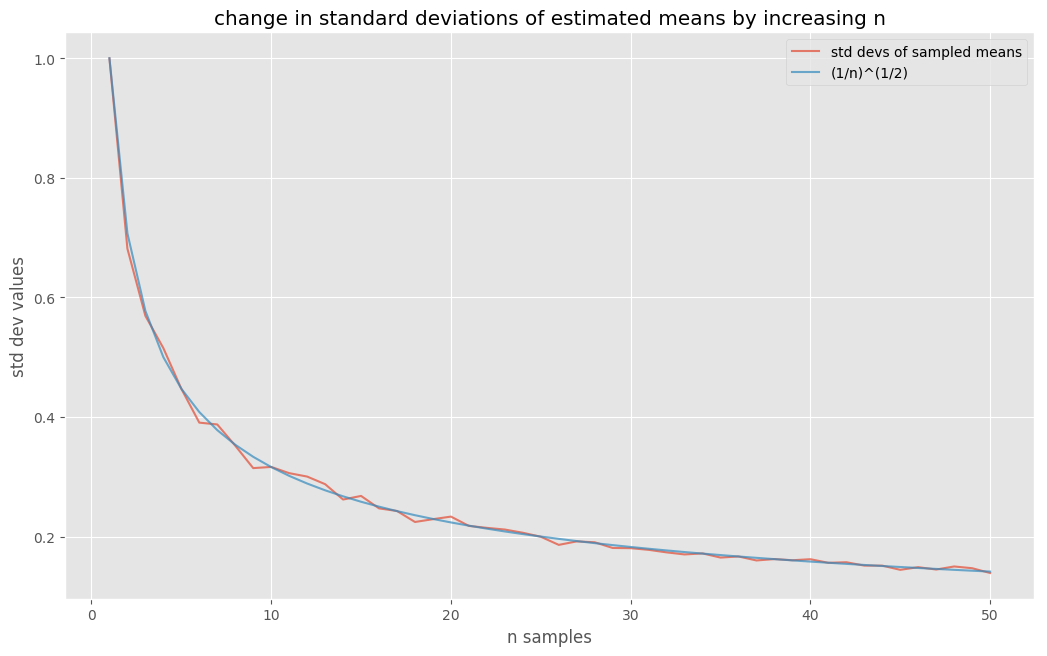

In [441]:
plt.figure(2, figsize=(12.5, 7.5), dpi=100)

plt.plot(x_axis_50, list_of_stds_of_sampled_means, alpha=0.7, label="std devs of sampled means")
plt.plot(x_axis_50, np.reciprocal(np.sqrt(x_axis_50)), alpha=0.7, label="(1/n)^(1/2)")
plt.xlabel("n samples")
plt.ylabel("std dev values")
plt.title("change in standard deviations of estimated means by increasing n")
plt.legend()

plt.show()

#### Question from (1a): Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

As our sample size _N_ increases, our power to estimate the qualities of our distributions increases for a given experiment. The mean or the average depends on the amount of samples taken since calculating it involves dividing by the total number of observations. Thus by simply having a larger number of observations, our estimation of the mean by definition becomes more accurate. This can further be extended by saying that if we could take an infinite amount of observations, we would know the exact mean.

There is another concept known as the standard error or the standard error of the mean. Since we know there is a totoal distribution of values, and since we cannot completely observe the total distribution, we take a sample of it. The number of samples we take is _N_. The mean of this sample, as well as the variance(the average of the squared deviation from the mean) of this sample are not equivalent to the mean and the variance of the total population. The standard error then is just a measure of how our sampled means vary from the population mean.

**The sample based estimate of the mean approximates the total population mean at larger and larger _N_.**

#### (1b) Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

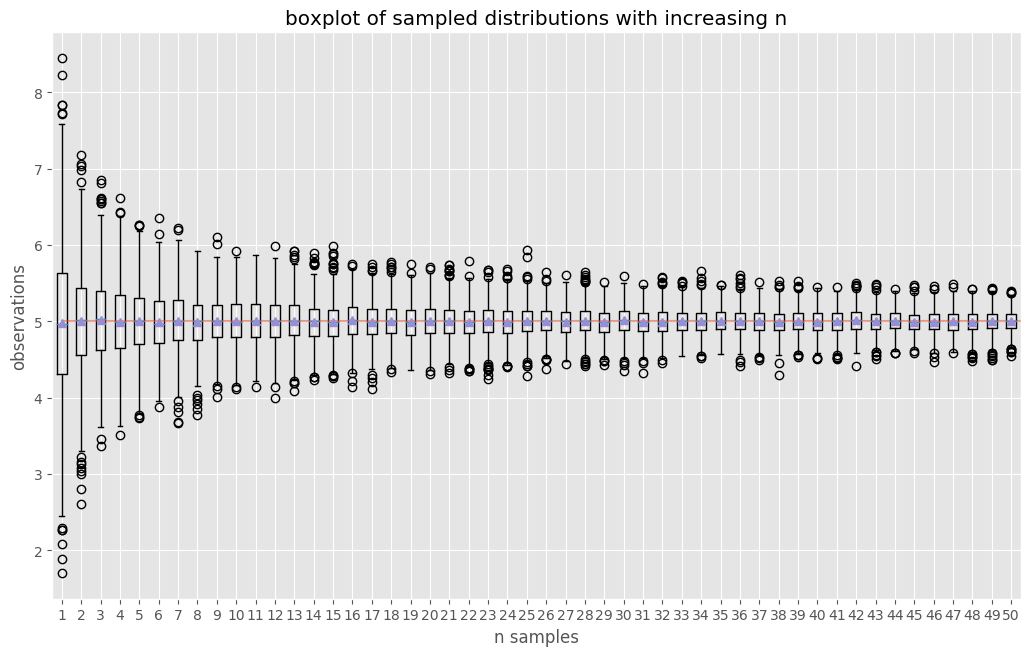

In [442]:
plt.figure(3, figsize=(12.5, 7.5), dpi=100)

plt.boxplot(array_of_list_of_sampled_means, showmeans=True)
plt.plot([1,51], [mu_1,mu_1], alpha=0.5)
plt.xlabel("n samples")
plt.ylabel("observations")
plt.title("boxplot of sampled distributions with increasing n")

plt.show()

#### Question from (1b): Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

The boxplot gives us the quartiles in perspective of the entire data as viewed as a histogram. For example, in the n=1, 1000 trial distribution of sampled means, we see that the central box covers the third and first quartiles, in a range known as the _IQR_. Inside the box is a blue line for the median, as well as a purple marker for the mean. Beyond the box, are the whiskers where the top and bottom ends denote the maximum and minimum values of that distribution. We see that in n=1, the samples are not powerful enough to stay close to the mean, so we have a wide variation of values. The dots are outlier values, with respect to each dataset. As _N_ increases, the stringency on what it takes to be not an outlier becomes harsher and harsher, since we can approximate the mean better and better. This is why the n=1 has few outliers. Another way to think of a box plot is to view it as a vertical histogram of a normal distribution.

This graph tells us more about the gains we get in accuracy by sampling more and more, while the previous graph just gives us an estimate of that gain. Furthermore, the boxplot gives far more information than the previous plot, that is, information about the entire dataset, not just a summary statstic of the standard deviation.

#### (1c) For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test (`sp.stats.kstest`) to see if this sample distribution is normal (hint you will need to translate this to the standard normal distribution). Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

sample mean: -2.04902761425e-15
sample standard deviation: 1.0
KstestResult(statistic=0.021209469091603428, pvalue=0.75928794135999766)


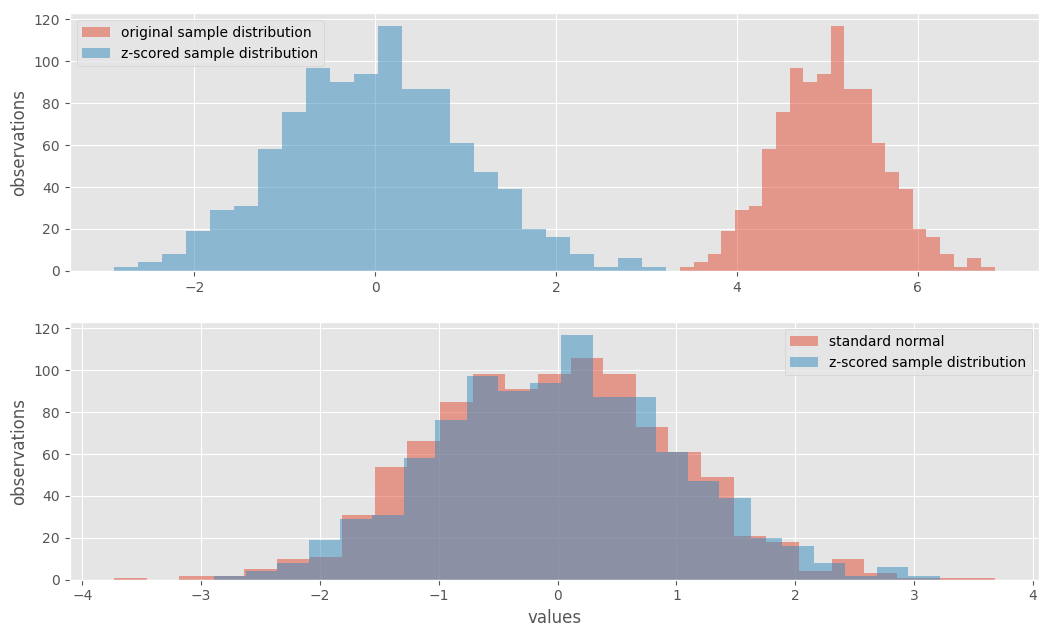

In [443]:
norm_1000 = np.random.normal(loc=0, scale=1, size=1000)

zscored_standard_column_3 = sp.stats.zscore(array_of_list_of_sampled_means[2])

print("sample mean: %s" % np.mean(zscored_standard_column_3))
print("sample standard deviation: %s" % np.std(zscored_standard_column_3))
print(sp.stats.kstest(zscored_standard_column_3, 'norm'))

plt.figure(4, figsize=(12.5, 7.5), dpi=100)

plt.subplot(211)
plt.hist(array_of_list_of_sampled_means[2], bins="auto", alpha=0.5, label="original sample distribution")
plt.hist(zscored_standard_column_3, bins="auto", alpha=0.5, label="z-scored sample distribution")
plt.ylabel("observations")
plt.legend()

plt.subplot(212)
plt.hist(norm_1000, bins="auto",alpha=0.5, label="standard normal")
plt.hist(zscored_standard_column_3, bins="auto", alpha=0.5, label="z-scored sample distribution")
plt.xlabel("values")
plt.ylabel("observations")
plt.legend()

plt.show()

####   Question from (1c): Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

sample mean: 9.02389274415e-16

sample standard deviation: 1.0

KstestResult(statistic=0.014387320045153196, pvalue=0.98578676528872744)

The _p_-value is extremely high. Since we z-scored our sample distribution, which was already normal, and made it have a mean of 0 and a variance of 1, we've essentially turned it into another standard normal. If we compare a sample standard normal to a standard normal, the distributions are going to be relatively similar (if not the same). The null hypothesis states that the two distributions we are comparing are the same, while the alternate hypothesis says that they are different. When the _p_-value is very high, we fail to reject the null, since it tells us that the two distributions are similar.

#### (1d) Repeat 1c but for n=20. What changes when the number of samples increases?

sample mean: -7.06990022081e-16
sample standard deviation: 1.0
KstestResult(statistic=0.014356749597685403, pvalue=0.98611385442974342)


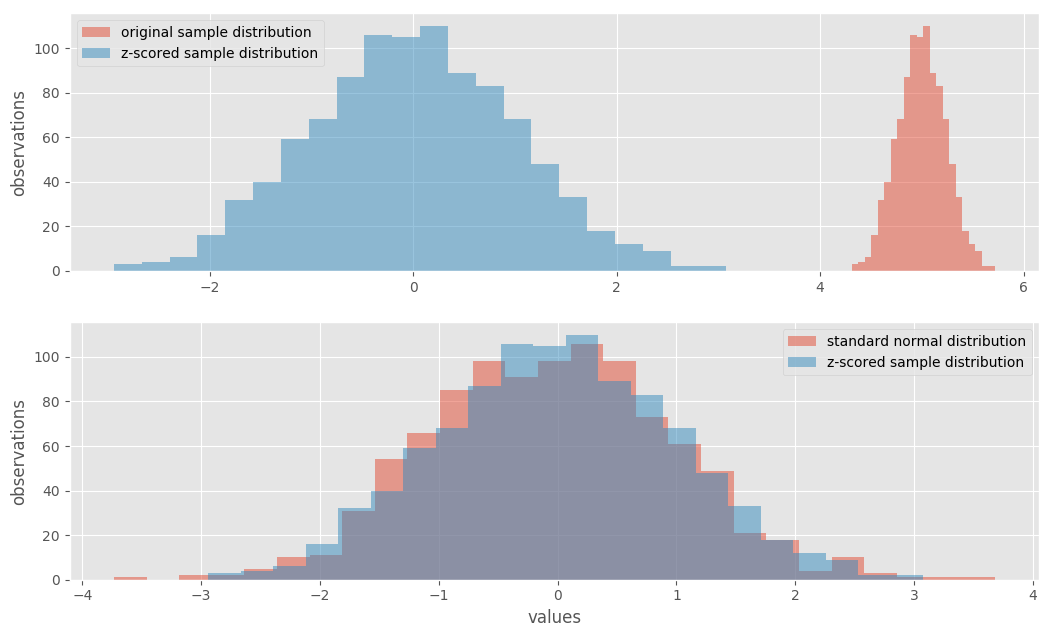

In [444]:
zscored_standard_column_20 = sp.stats.zscore(array_of_list_of_sampled_means[19])

print("sample mean: %s" % np.mean(zscored_standard_column_20))
print("sample standard deviation: %s" % np.std(zscored_standard_column_20))
print(sp.stats.kstest(zscored_standard_column_20, 'norm'))

plt.figure(5, figsize=(12.5, 7.5), dpi=100)

plt.subplot(211)
plt.hist(array_of_list_of_sampled_means[19], bins="auto", alpha=0.5, label="original sample distribution")
plt.hist(zscored_standard_column_20, bins="auto", alpha=0.5, label="z-scored sample distribution")
plt.ylabel("observations")
plt.legend()

plt.subplot(212)
plt.hist(norm_1000, bins="auto",alpha=0.5,  label="standard normal distribution")
plt.hist(zscored_standard_column_20, bins="auto", alpha=0.5, label="z-scored sample distribution")
plt.xlabel("values")
plt.ylabel("observations")
plt.legend()

plt.show()

In [445]:
#zscored_standard_column_35 = sp.stats.zscore(array_of_list_of_sampled_means[34])

#print(sp.stats.kstest(zscored_standard_column_35, 'norm'))

#plt.figure(6, figsize=(12.5, 7.5), dpi=100)

#plt.subplot(211)
#plt.hist(array_of_list_of_sampled_means[34], bins="auto", alpha=0.5)
#plt.hist(zscored_standard_column_35, bins="auto",alpha=0.5)

#plt.subplot(212)
#plt.hist(norm_1000, bins="auto",alpha=0.5)
#plt.hist(zscored_standard_column_35, bins="auto",alpha=0.5)

#plt.show()

In [446]:
#zscored_standard_column_50 = sp.stats.zscore(array_of_list_of_sampled_means[49])

#print(sp.stats.kstest(zscored_standard_column_50, 'norm'))

#plt.figure(7, figsize=(12.5, 7.5), dpi=100)

#plt.subplot(211)
#plt.hist(array_of_list_of_sampled_means[49], bins="auto", alpha=0.5)
#plt.hist(zscored_standard_column_50, bins="auto",alpha=0.5)

#plt.subplot(212)
#plt.hist(norm_1000, bins="auto",alpha=0.5)
#plt.hist(zscored_standard_column_50, bins="auto",alpha=0.5)

#plt.show()

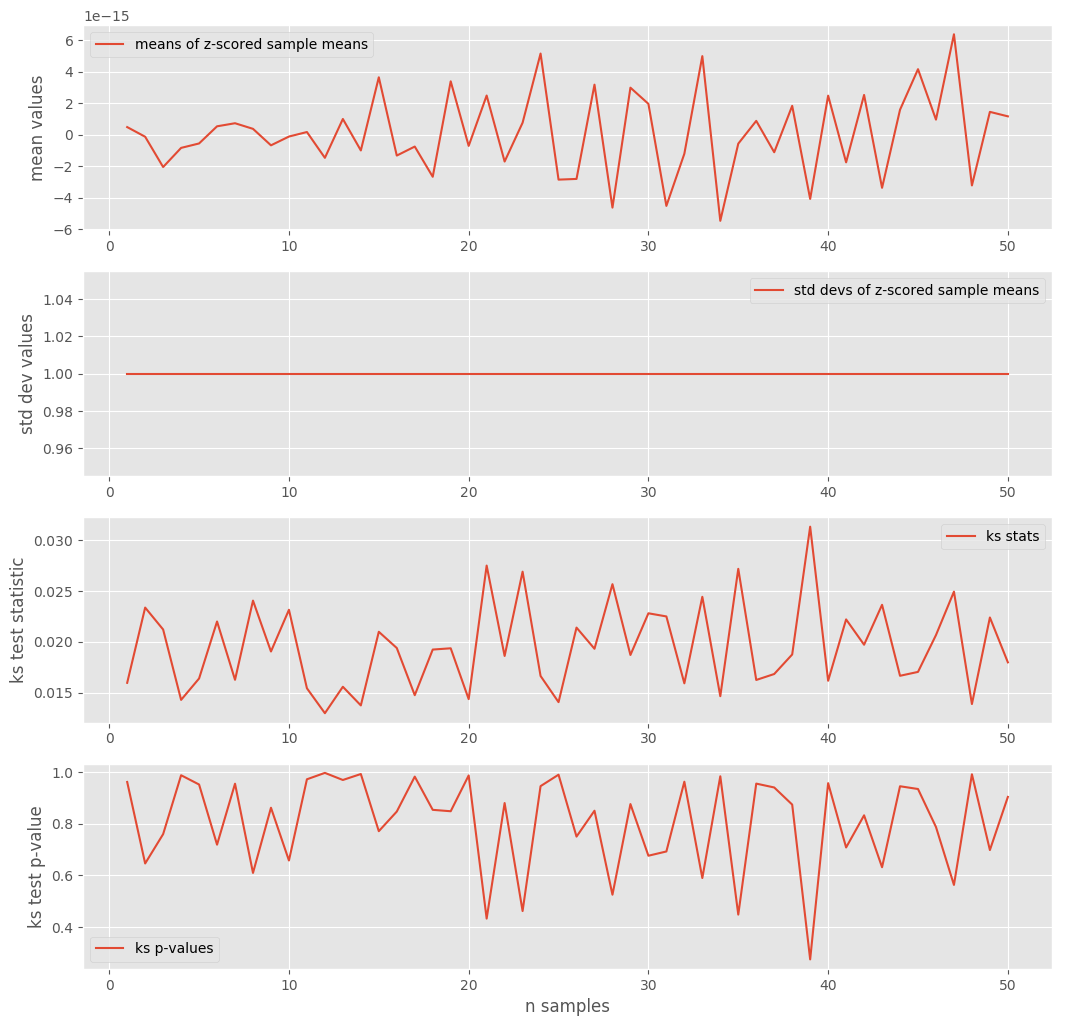

In [447]:
list_of_zscored_mean_of_sampled_means = []
list_of_zscored_stds_of_sampled_means = []
list_of_ks_stats = []
list_of_p_values = []

for n in range(50):
    zscored_standard_column_n = sp.stats.zscore(array_of_list_of_sampled_means[n])
    list_of_zscored_mean_of_sampled_means.append(np.mean(zscored_standard_column_n))
    list_of_zscored_stds_of_sampled_means.append(np.std(zscored_standard_column_n))
    list_of_ks_stats.append(sp.stats.kstest(zscored_standard_column_n, 'norm')[0])
    list_of_p_values.append(sp.stats.kstest(zscored_standard_column_n, 'norm')[1])

plt.figure(8, figsize=(12.5, 12.5), dpi=100)

plt.subplot(411)
plt.plot(x_axis_50, list_of_zscored_mean_of_sampled_means, label="means of z-scored sample means")
plt.ylabel("mean values")
plt.legend()

plt.subplot(412)
plt.plot(x_axis_50, list_of_zscored_stds_of_sampled_means, label="std devs of z-scored sample means")
plt.ylabel("std dev values")
plt.legend()

plt.subplot(413)
plt.plot(x_axis_50, list_of_ks_stats, label="ks stats")
plt.ylabel("ks test statistic")
plt.legend()

plt.subplot(414)
plt.plot(x_axis_50, list_of_p_values, label="ks p-values")
plt.xlabel("n samples")
plt.ylabel("ks test p-value")
plt.legend()

plt.show()

#### Question from (1d): What changes when the number of samples increases?

The two distributions are already extremely similar to begin with, which is why they have such high _p_-values, but we can generally see an upward trend due to there being more observations added, which causes our distribution to tend toward standard normal. We can see that the _p_-value slightly rises and that the ks statistic slightly lowers. At infinite sampling, we can assume that the _p_-value is 1, and the ks test statistic converges to 0.

## (2) Weibull distribution

Now we will explore sampling from an alternate distribution type.

#### (2a) Sample the Weibull distribution with parameters a = 1, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

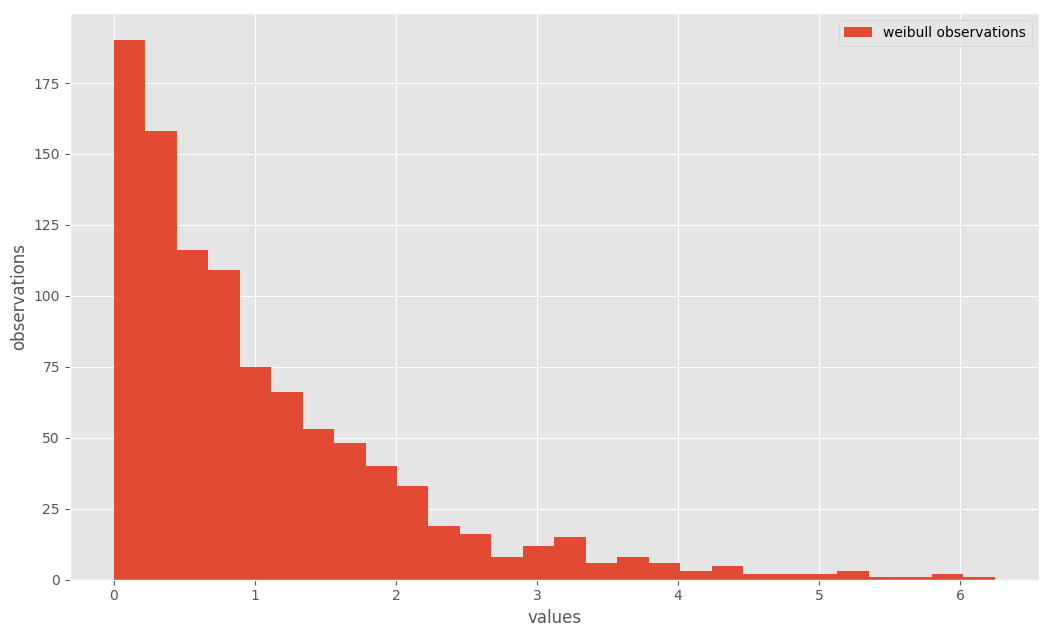

In [448]:
a_1 = 1

Weibull_1000 = np.random.weibull(a=a_1, size=(1000,))

plt.figure(8, figsize=(12.5, 7.5), dpi=100)

plt.hist(Weibull_1000, bins="auto", label="weibull observations")
plt.xlabel("values")
plt.ylabel("observations")
plt.legend()

plt.show()

#### Question from (2a): Describe the shape of this histogram in words. Is it anything like the normal distribution?

This looks nothing like the normal distribution, as it's not really centered around a mean and spread out due to some variance. The parameter gives it its shape, while the second parameter is a scaling factor. It also looks exponentially decaying as well as sticking to only nonnegative values.

#### (2b) As in problem 1, plot a boxplot of the sample distribution of the Weibull with A=1,B=1 from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

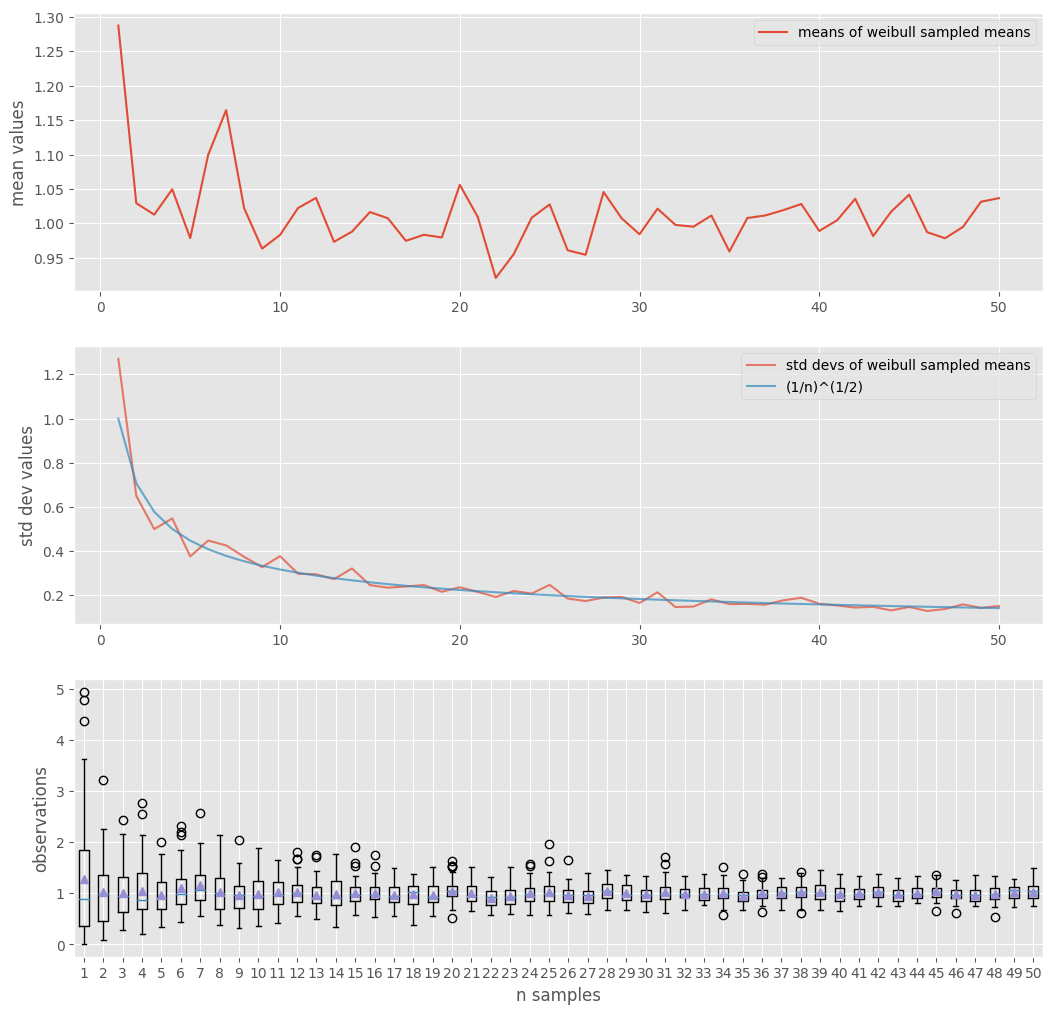

In [449]:
b_1 = 1

array_of_list_of_sampled_means_weibull = []

for n in range(50):
    nth_column_of_means_weibull = []
    for i in range(50):
        W = b_1*np.random.weibull(a=a_1, size=(n+1,))
        nth_column_of_means_weibull.append(np.mean(W))
    
    array_of_list_of_sampled_means_weibull.append(nth_column_of_means_weibull)

list_of_means_of_sampled_means_weibull = []
list_of_variances_of_sampled_means_weibull = []
list_of_stds_of_sampled_means_weibull = []
for n in range(50):
    list_of_means_of_sampled_means_weibull.append(np.mean(array_of_list_of_sampled_means_weibull[n]))
    list_of_variances_of_sampled_means_weibull.append(np.var(array_of_list_of_sampled_means_weibull[n]))
    list_of_stds_of_sampled_means_weibull.append(np.std(array_of_list_of_sampled_means_weibull[n]))

plt.figure(9, figsize=(12.5, 12.5), dpi=100)

plt.subplot(311)
plt.plot(x_axis_50, list_of_means_of_sampled_means_weibull, label="means of weibull sampled means")
plt.ylabel("mean values")
plt.legend()

plt.subplot(312)
plt.plot(x_axis_50, list_of_stds_of_sampled_means_weibull, alpha=0.7, label="std devs of weibull sampled means")
plt.ylabel("std dev values")
plt.plot(x_axis_50, np.reciprocal(np.sqrt(x_axis_50)), alpha=0.7, label="(1/n)^(1/2)")
plt.legend()

plt.subplot(313)
plt.boxplot(array_of_list_of_sampled_means_weibull, showmeans=True)
plt.ylabel("observations")
plt.xlabel("n samples")

plt.show()

#### Question from (2b): How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

The sample mean estimates starts out lower than the actual mean, but converges to that mean. This makes sense though, because, unlike the normal distribution studied in problem 1, the Weibull distribution is not centered around its mean. The boxplots for values of low _n_ indicate how the distribution of means is not centered around its mean. This changes as _n_ increases and as the distribution tends to normal. However, regardless of that manner, the way in which the standard deviations of the sample mean estimates decreases is still proportional to $\frac{1}{\sqrt{n}}$.

#### (2c) For n=3, plot the histogram of the sample means. What is this distribution, is it Weibull or normal? Report your test results.

KstestResult(statistic=0.092529845930361454, pvalue=0.78534649500350628)


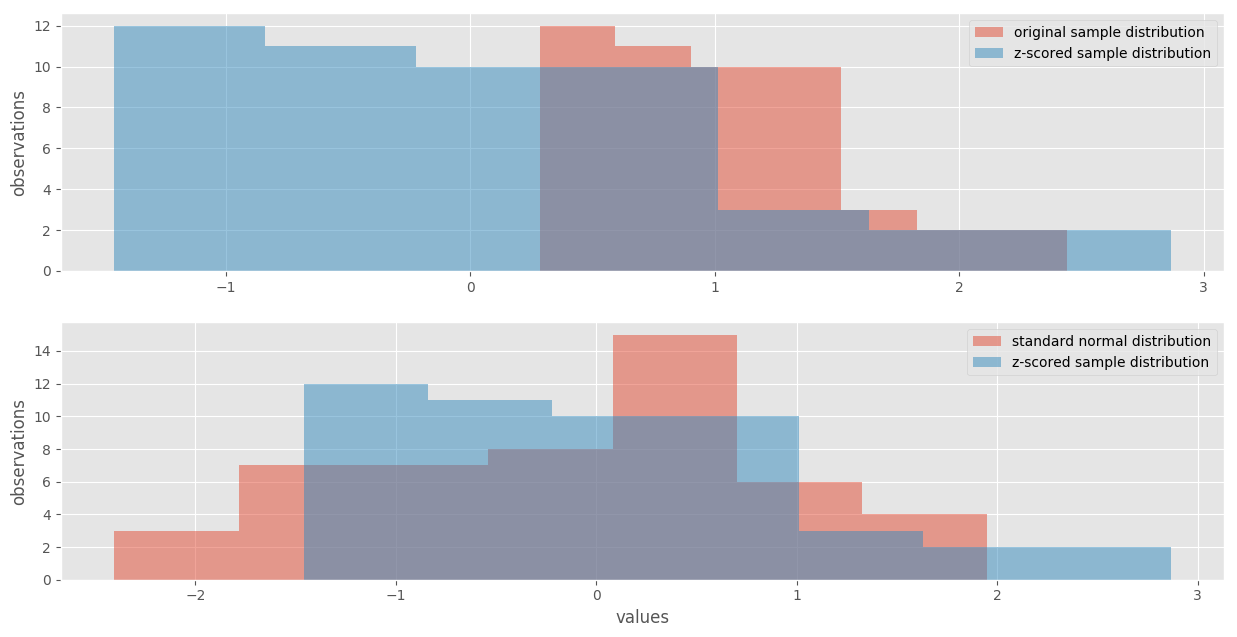

In [450]:
norm_50 = np.random.normal(loc=0, scale=1, size=(50,))

zscored_standard_column_3_weibull = sp.stats.zscore(array_of_list_of_sampled_means_weibull[2])

print(sp.stats.kstest(zscored_standard_column_3_weibull, 'norm'))

plt.figure(10, figsize=(15, 7.5), dpi=100)

plt.subplot(211)
plt.hist(array_of_list_of_sampled_means_weibull[2], bins="auto", alpha=0.5, label="original sample distribution")
plt.hist(zscored_standard_column_3_weibull, bins="auto", alpha=0.5, label="z-scored sample distribution")
plt.ylabel("observations")
plt.legend()

plt.subplot(212)
plt.hist(norm_50, bins="auto",alpha=0.5, label="standard normal distribution")
plt.hist(zscored_standard_column_3_weibull, bins="auto",alpha=0.5, label="z-scored sample distribution")
plt.ylabel("observations")
plt.xlabel("values")
plt.legend()

plt.show()

#### Question from (2c): What is this distribution, is it Weibull or normal? Report your test results.

KstestResult(statistic=0.13996423511103978, pvalue=0.25683155853255579)

The shape of the distribution is clearly Weibull, but the _p_-value is indicating that it is also pretty close to being normal.

#### (2d) Repeat 2c and 2d for n=20 (don’t include the plots, but do include the test result for normality and explain the impact of the number of samples n, on normality).

KstestResult(statistic=0.098147940355040486, pvalue=0.71648777019173893)


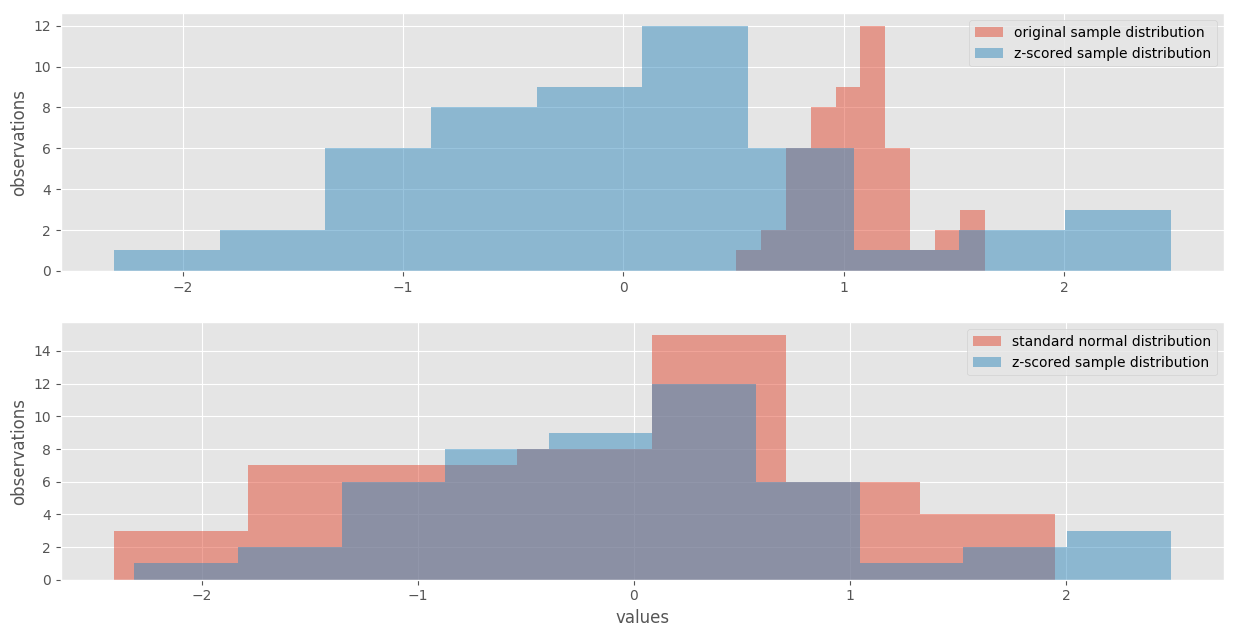

In [451]:
zscored_standard_column_20_weibull = sp.stats.zscore(array_of_list_of_sampled_means_weibull[19])

print(sp.stats.kstest(zscored_standard_column_20_weibull, 'norm'))

plt.figure(11, figsize=(15, 7.5), dpi=100)

plt.subplot(211)
plt.hist(array_of_list_of_sampled_means_weibull[19], bins="auto", alpha=0.5, label="original sample distribution")
plt.hist(zscored_standard_column_20_weibull, bins="auto", alpha=0.5, label="z-scored sample distribution")
plt.ylabel("observations")
plt.legend()

plt.subplot(212)
plt.hist(norm_50, bins="auto",alpha=0.5, label="standard normal distribution")
plt.hist(zscored_standard_column_20_weibull, bins="auto", alpha=0.5, label="z-scored sample distribution")
plt.ylabel("observations")
plt.xlabel("values")
plt.legend()

plt.show()

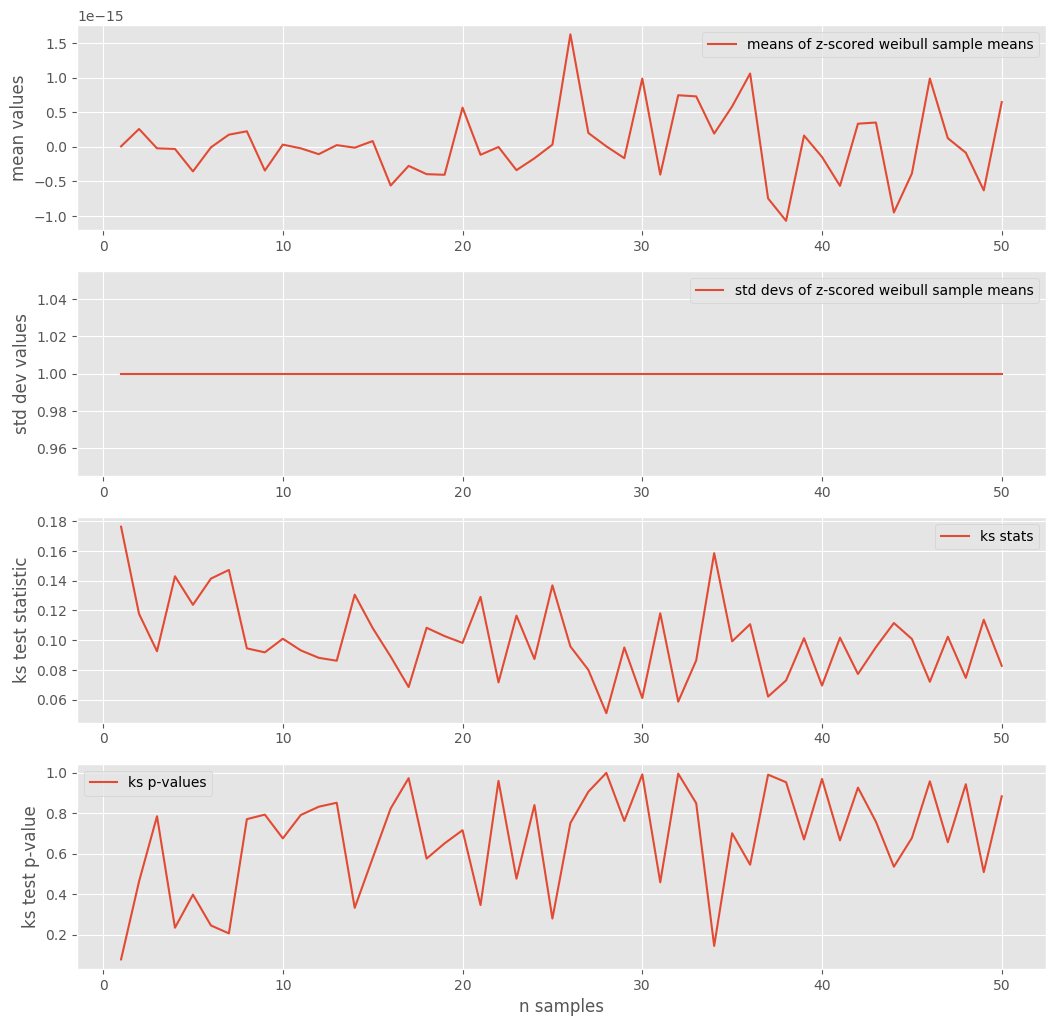

In [452]:
list_of_zscored_mean_of_sampled_means_weibull = []
list_of_zscored_stds_of_sampled_means_weibull = []
list_of_ks_stats_weibull = []
list_of_p_values_weibull = []

for n in range(50):
    zscored_standard_column_n_weibull = sp.stats.zscore(array_of_list_of_sampled_means_weibull[n])
    list_of_zscored_mean_of_sampled_means_weibull.append(np.mean(zscored_standard_column_n_weibull))
    list_of_zscored_stds_of_sampled_means_weibull.append(np.std(zscored_standard_column_n_weibull))
    list_of_ks_stats_weibull.append(sp.stats.kstest(zscored_standard_column_n_weibull, 'norm')[0])
    list_of_p_values_weibull.append(sp.stats.kstest(zscored_standard_column_n_weibull, 'norm')[1])

plt.figure(12, figsize=(12.5, 12.5), dpi=100)

plt.subplot(411)
plt.plot(x_axis_50, list_of_zscored_mean_of_sampled_means_weibull, label="means of z-scored weibull sample means")
plt.ylabel("mean values")
plt.legend()

plt.subplot(412)
plt.plot(x_axis_50, list_of_zscored_stds_of_sampled_means_weibull, label="std devs of z-scored weibull sample means")
plt.ylabel("std dev values")
plt.legend()

plt.subplot(413)
plt.plot(x_axis_50, list_of_ks_stats_weibull, label="ks stats")
plt.ylabel("ks test statistic")
plt.legend()

plt.subplot(414)
plt.plot(x_axis_50, list_of_p_values_weibull, label="ks p-values")
plt.xlabel("n samples")
plt.ylabel("ks test p-value")
plt.legend()

plt.show()

#### Question from (2d):  Explain the impact of the number of samples n, on normality.

We can see the trend in the ks _p_-values, that increasing _n_ leads to higher _p_-values, meaning that the taking more samples of the distribution of the means tends it to be normal. This is an example of the Central Limit Theorem.

#### (2e) Repeat 2c but with A=10 and B=2 (I.e plot the histogram of the calculated sample means for 1000 trials of n=3). What is this distribution, Weibull or normal? Why does it look different than in 1c?

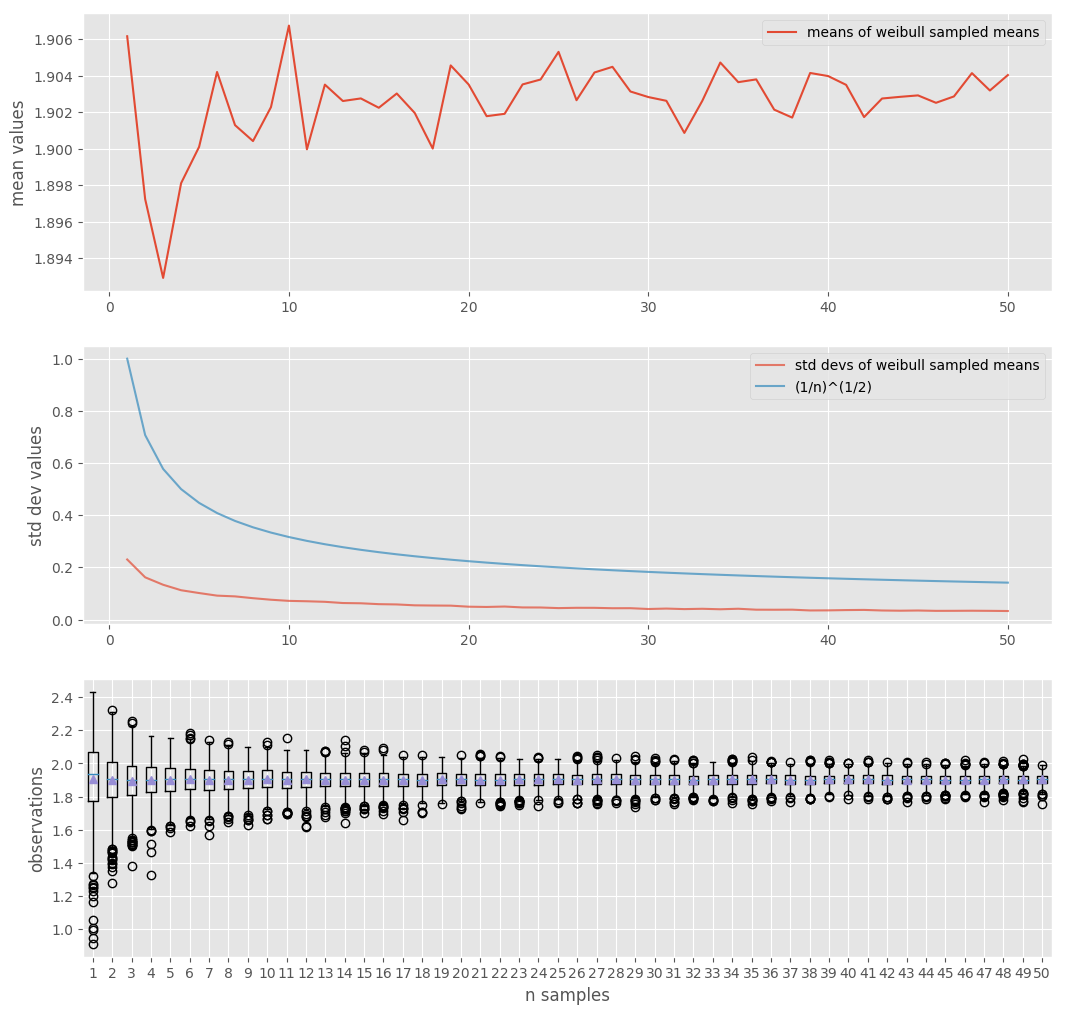

In [453]:
a_2, b_2 = 10, 2

array_of_list_of_sampled_means_weibull_1000 = []

for n in range(50):
    nth_column_of_means_weibull_1000 = []
    for i in range(1000):
        W_1000 = b_2*np.random.weibull(a=a_2, size=(n+1,))
        nth_column_of_means_weibull_1000.append(np.mean(W_1000))
    
    array_of_list_of_sampled_means_weibull_1000.append(nth_column_of_means_weibull_1000)

list_of_means_of_sampled_means_weibull_1000 = []
list_of_variances_of_sampled_means_weibull_1000 = []
list_of_stds_of_sampled_means_weibull_1000 = []
for n in range(50):
    list_of_means_of_sampled_means_weibull_1000.append(np.mean(array_of_list_of_sampled_means_weibull_1000[n]))
    list_of_variances_of_sampled_means_weibull_1000.append(np.var(array_of_list_of_sampled_means_weibull_1000[n]))
    list_of_stds_of_sampled_means_weibull_1000.append(np.std(array_of_list_of_sampled_means_weibull_1000[n]))

plt.figure(13, figsize=(12.5, 12.5), dpi=100)

plt.subplot(311)
plt.plot(x_axis_50, list_of_means_of_sampled_means_weibull_1000, label="means of weibull sampled means")
plt.ylabel("mean values")
plt.legend()

plt.subplot(312)
plt.plot(x_axis_50, list_of_stds_of_sampled_means_weibull_1000, alpha=0.7, label="std devs of weibull sampled means")
plt.ylabel("std dev values")
plt.plot(x_axis_50, np.reciprocal(np.sqrt(x_axis_50)), alpha=0.7, label="(1/n)^(1/2)")
plt.legend()

plt.subplot(313)
plt.boxplot(array_of_list_of_sampled_means_weibull_1000, showmeans=True)
plt.ylabel("observations")
plt.xlabel("n samples")

plt.show()

KstestResult(statistic=0.032953314366389597, pvalue=0.22297181732622562)


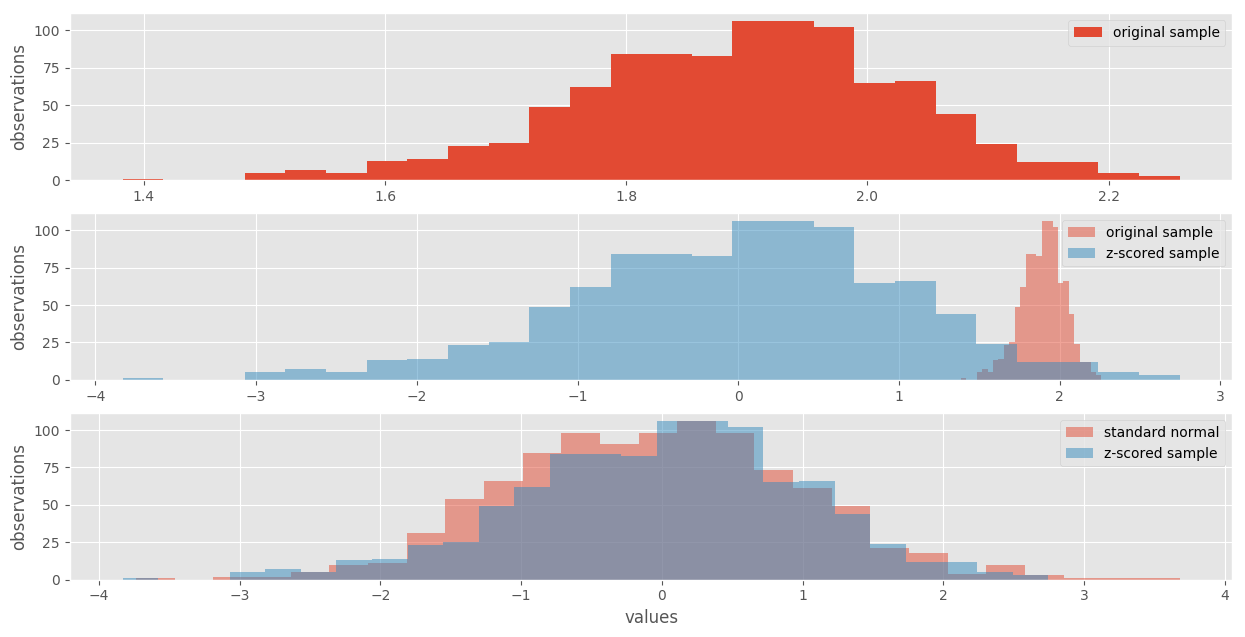

In [454]:
zscored_standard_column_3_weibull_1000 = sp.stats.zscore(array_of_list_of_sampled_means_weibull_1000[2])

print(sp.stats.kstest(zscored_standard_column_3_weibull_1000, 'norm'))

plt.figure(14, figsize=(15, 7.5), dpi=100)

plt.subplot(311)
plt.hist(array_of_list_of_sampled_means_weibull_1000[2], bins="auto", label="original sample")
plt.ylabel("observations")
plt.legend()

plt.subplot(312)
plt.hist(array_of_list_of_sampled_means_weibull_1000[2], bins="auto", alpha=0.5, label="original sample")
plt.hist(zscored_standard_column_3_weibull_1000, bins="auto", alpha=0.5, label="z-scored sample")
plt.ylabel("observations")
plt.legend()


plt.subplot(313)
plt.hist(norm_1000, bins="auto",alpha=0.5, label="standard normal")
plt.hist(zscored_standard_column_3_weibull_1000, bins="auto",alpha=0.5, label="z-scored sample")
plt.ylabel("observations")
plt.xlabel("values")
plt.legend()

plt.show()

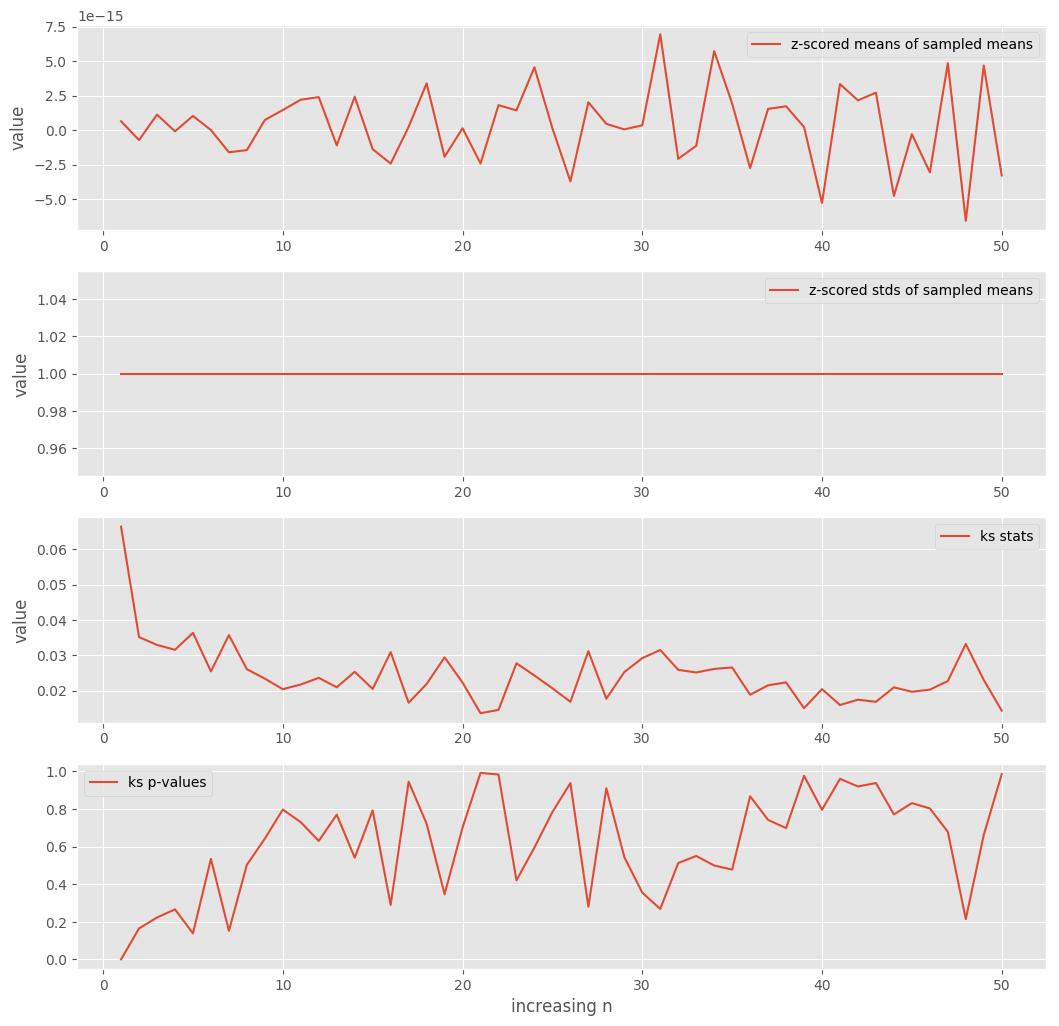

In [455]:
list_of_zscored_mean_of_sampled_means_weibull_1000 = []
list_of_zscored_stds_of_sampled_means_weibull_1000 = []
list_of_ks_stats_weibull_1000 = []
list_of_p_values_weibull_1000 = []

for n in range(50):
    zscored_standard_column_n_weibull_1000 = sp.stats.zscore(array_of_list_of_sampled_means_weibull_1000[n])
    list_of_zscored_mean_of_sampled_means_weibull_1000.append(np.mean(zscored_standard_column_n_weibull_1000))
    list_of_zscored_stds_of_sampled_means_weibull_1000.append(np.std(zscored_standard_column_n_weibull_1000))
    list_of_ks_stats_weibull_1000.append(sp.stats.kstest(zscored_standard_column_n_weibull_1000, 'norm')[0])
    list_of_p_values_weibull_1000.append(sp.stats.kstest(zscored_standard_column_n_weibull_1000, 'norm')[1])

plt.figure(15, figsize=(12.5, 12.5), dpi=100)

plt.subplot(411)
plt.plot(x_axis_50, list_of_zscored_mean_of_sampled_means_weibull_1000, label="z-scored means of sampled means")
plt.ylabel("value")
plt.legend()

plt.subplot(412)
plt.plot(x_axis_50, list_of_zscored_stds_of_sampled_means_weibull_1000, label="z-scored stds of sampled means")
plt.ylabel("value")
plt.legend()

plt.subplot(413)
plt.plot(x_axis_50, list_of_ks_stats_weibull_1000, label="ks stats")
plt.ylabel("value")
plt.legend()

plt.subplot(414)
plt.plot(x_axis_50, list_of_p_values_weibull_1000, label="ks p-values")
plt.xlabel("increasing n")
plt.legend()

plt.show()

#### Question from (2e): What is this distribution, Weibull or normal? Why does it look different than in 1c?

The shape of the Weibull distribution can be manipulated by _a_ giving it different shapes. This parameter makes it look almost normal.

## (3) Differential expression

In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards.

- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

#### (3a) False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [456]:
def ttestComp(mu_a, sigma_a, mu_b, sigma_b, size, number_of_tests, alpha):
    dist_a_holder = []
    dist_b_holder = []
    p_value_holder = []
    p_value_counter_greater_than_alpha = 0
    p_value_counter_less_than_or_equal_to_alpha = 0

    for i in range(number_of_tests):
        dist_a_holder.append(np.random.normal(loc=mu_a, scale=sigma_a, size=size))
        dist_b_holder.append(np.random.normal(loc=mu_b, scale=sigma_b, size=size))
        p_value_holder.append(sp.stats.ttest_ind(dist_a_holder[i], dist_b_holder[i])[1])
        #print(p_value_holder)
        if (p_value_holder[i]>alpha):
            p_value_counter_greater_than_alpha+=1
            #print(p_value_counter_greater_than_alpha)
        else:
            p_value_counter_less_than_or_equal_to_alpha+=1
    
    p_value_results = [p_value_counter_greater_than_alpha, 100*(p_value_counter_greater_than_alpha / number_of_tests), p_value_counter_less_than_or_equal_to_alpha, 100*(p_value_counter_less_than_or_equal_to_alpha / number_of_tests)]
    
    
    return(p_value_results)

From a statistics dictionary, _alpha_, with respect to estimation problems, refers to the likelihood that the true population parameter lies outside the confidence interval. Alpha is usually expressed as a proportion. Thus, if the confidence level is 95%, then alpha would equal 1 - 0.95 or 0.05.

With respect to hypothesis tests, alpha refers to significance level, the probability of making a Type I, false positive, error.

In [457]:
mu_3, sigma_3 = 1, 1
mu_4, sigma_4 = 3, 1

number_of_tests = 100
alpha = 0.05

ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_4, sigma_b=sigma_4, size=(3,), number_of_tests=number_of_tests, alpha=0.05)

[60, 60.0, 40, 40.0]

#### Question from (3a): Anytime you fail to reject the null hypothesis, it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

A _false negative_ is when we fail to believe a true alternative hypothesis. This is the same as saying we fail to reject the null hypothesis even though the null hypothesis is actuallly false. In this case, we'd say the null hypothesis is that the two distributions are the same, or that they are not different. The alternate hypothesis would be that they are different. Our two distributions _are_ different (the true difference in means is not 0), so every time we get a _p_-value greater than 0.05 and fail to reject the null hypothesis, we are making a false negative mistake.

According to the function I wrote, the first number in the array is the number of times we had a _p_-value greater than alpha. Having a _p_-value greater than alpha means that we fail to reject the null hypothesis, or that the two distributions are similar. However, the distributions are not similar, so we essentially have made about 49 to 51 in correct guesses. The reason for this is that our means are extremely close to each other, with a std dev of 1. That means the mean of one distribution is within the mean of the other distribution. This is the reason why have so many false negatives since we should be rejecting the null not accepting it, but the amount of mistakes we make is nearly 50-50.

#### (3b) False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [458]:
ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_3, sigma_b=sigma_3, size=(3,), number_of_tests=number_of_tests, alpha=0.05)

[95, 95.0, 5, 5.0]

#### Question from (3b): Anytime you reject the null hypothesis, it is a false hypothesis. Why is this a false positive? Report the number of false positives from your 100 tests.

A _false positive_ is when we incorrectly reject the true null hypothesis. This is the same as saying we reject the null hypothesis even though the null hypothesis is actuallly true, and the distributions are similar. In this case, we'd say the null hypothesis is that the two distributions are the same, or that they are not different. The alternate hypothesis would be that they are different. Our two distributions _are_ the same (they're the exact same distribution, with the same mean), so every time we get a _p_-value less than 0.05 and fail not to reject the null hypothesis, we are making a false positive mistake. We should be accepting the null hypothesis that there is no difference between the two same distributions.

Here we are comparing the two same distributions, so the _p_-value should be low or less than alpha. We only have such a number less than about 5% of the time (the second two numbers in the printed array, the third number in the array is a number of times we encountered a false positive, and the fourth number in the array is the percentage of times we encountered a false positive). This is good since, we know the distributions are the same, so number of times we reject the null (the number of times the _p_-value is low) should be small.

#### (3c) Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [459]:
print(ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_3, sigma_b=sigma_3, size=(3,), number_of_tests=10*number_of_tests, alpha=0.05))

print(ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_3, sigma_b=sigma_3, size=(3,), number_of_tests=100*number_of_tests, alpha=0.05))

print(ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_3, sigma_b=sigma_3, size=(3,), number_of_tests=1000*number_of_tests, alpha=0.05))

[950, 95.0, 50, 5.0]
[9515, 95.15, 485, 4.8500000000000005]
[94904, 94.904, 5096, 5.096]


#### Question from (3c):Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

Here we see that increasing the number of t tests changes the usual number of _p_-values greater than or less than alpha by not that much. The percentage of values greater than alpha (the number of times we fail to reject the null) is going to waver around 94-96%, the second number in the array, while the percentage of values less than alpha (the number of times we wrongly accept the null) is going to waver around 6-4%, the fourth number in the array. The number of false positives in the 10,000 trial will be just ten times the number of false positives in the 1,000 trial. 

This is because changing the number of trials does not change the distributions we are looking at, just how many times we try to test it. As long as we dont disturb our distribution, but change something like the number of tests run or the number of samples observed, then the _p_-values won't change dramatically. Changing things like the mean or the std devs of our original distributions, which by definition changes our original distribution, will change our number of false positives.

#### (3d) Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

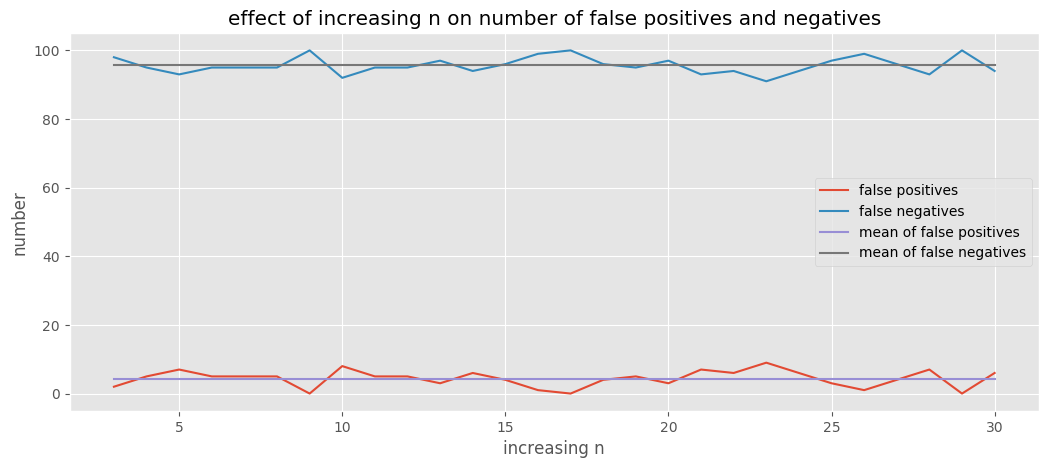

In [460]:
list_of_number_of_false_positives = []
list_of_number_of_false_negatives = []

for sizeVAR in range(3,31):
    throwaway4 = ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_3, sigma_b=sigma_3, size=(sizeVAR,), number_of_tests=number_of_tests, alpha=0.05)
    list_of_number_of_false_positives.append(throwaway4[3])
    list_of_number_of_false_negatives.append(throwaway4[1])

plt.figure(16, figsize=(12.5, 5), dpi=100)

plt.plot(np.arange(3,31), list_of_number_of_false_positives, label="false positives")

plt.plot(np.arange(3,31), list_of_number_of_false_negatives, label="false negatives")

plt.plot([3,30], [np.mean(list_of_number_of_false_positives), np.mean(list_of_number_of_false_positives)], label="mean of false positives")

plt.plot([3,30], [np.mean(list_of_number_of_false_negatives), np.mean(list_of_number_of_false_negatives)], label="mean of false negatives")

plt.xlabel("increasing n")
plt.ylabel("number")
plt.legend()
plt.title("effect of increasing n on number of false positives and negatives")

plt.show()

#### Question from (3d): Please explain the trend you see and interpret its meaning.

In this run, we changed the number of times we looked at the distribution and increased it from 3 to 30. This does not change the number of false positives that our test will count by a lot because, as mentioned before, we really have not disturbed or changed the distribution in anyway for the relationship between the two distributions to be different. Increasing the number of tests we take, and increasing the number of samples we take, does not change the distribution, or the relationship between the distributions. It may make the percentage of false positives more accurate, much like how taking more tests might tell us something about precision, but the actual value of the _p_-value will not change significantly. 

#### (3e) For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

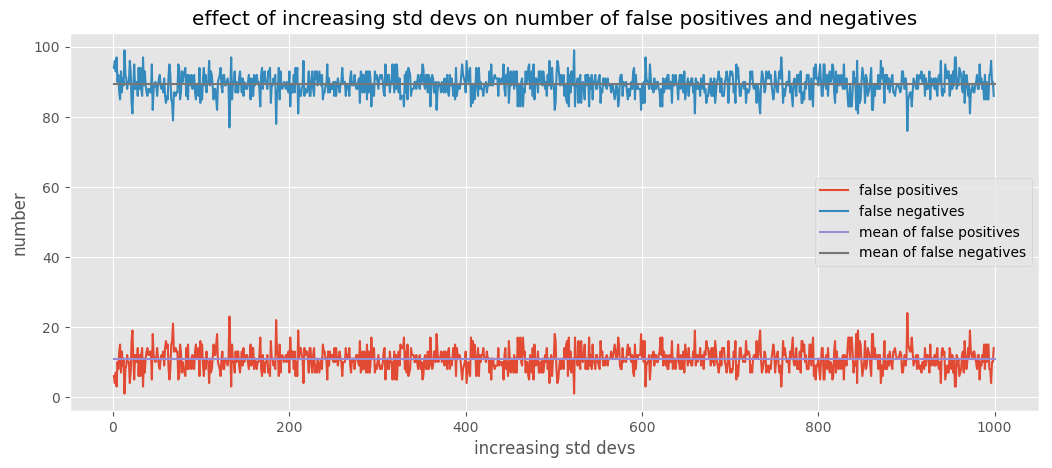

In [461]:
list_of_number_of_false_positives_varying_sigma = []
list_of_number_of_false_negatives_varying_sigma = []

for sigmaL in range(1,1000):
    throwaway1231 = ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_3, sigma_b=sigmaL, size=(3,), number_of_tests=number_of_tests, alpha=0.05)
    list_of_number_of_false_positives_varying_sigma.append(throwaway1231[3])
    list_of_number_of_false_negatives_varying_sigma.append(throwaway1231[1])

#print(np.arange(1,201), list_of_number_of_false_negatives_varying_sigma)
    
plt.figure(17, figsize=(12.5, 5), dpi=100)

plt.plot(np.arange(1,1000),list_of_number_of_false_positives_varying_sigma, label="false positives")

plt.plot(np.arange(1,1000),list_of_number_of_false_negatives_varying_sigma, label="false negatives")

plt.plot([1,1000], [np.mean(list_of_number_of_false_positives_varying_sigma), np.mean(list_of_number_of_false_positives_varying_sigma)], label="mean of false positives")

plt.plot([1,1000], [np.mean(list_of_number_of_false_negatives_varying_sigma), np.mean(list_of_number_of_false_negatives_varying_sigma)], label="mean of false negatives")

plt.xlabel("increasing std devs")
plt.ylabel("number")
plt.legend()
plt.title("effect of increasing std devs on number of false positives and negatives")

plt.show()

#### Question from (3e): For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

The number of false negatives again does not change that much even though the distributions are different. The distributions are different in that they have different standard deviations, so this must mean that we should be accepting the alternate hypothesis or reject the null. If we're rejecting the null hypothesis, we should be getting _p_-values less than alpha but that number is still extremely small, only around 10, while the number of times the _p_-values are greater than alpha is still really high, about 90. The test is then implying that the distributions are similar. We can see an actual change in _p_-values if we vary the means, like below.

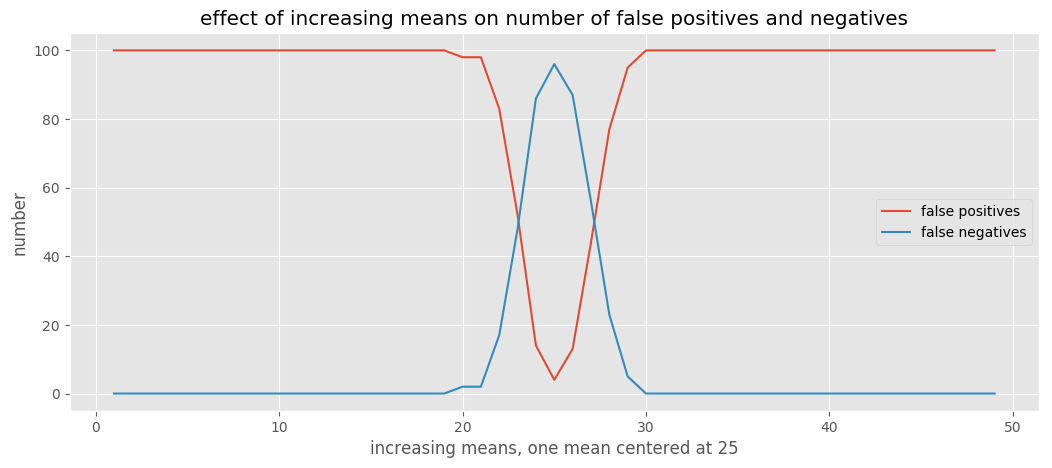

In [462]:
list_of_number_of_false_positives_varying_mean = []
list_of_number_of_false_negatives_varying_mean = []

for meanL in range(1,50):
    throwaway2234 = ttestComp(mu_a=25, sigma_a=sigma_3, mu_b=meanL, sigma_b=sigma_4, size=(3,), number_of_tests=number_of_tests, alpha=0.05)
    list_of_number_of_false_positives_varying_mean.append(throwaway2234[3])
    list_of_number_of_false_negatives_varying_mean.append(throwaway2234[1])

plt.figure(18, figsize=(12.5, 5), dpi=100)

plt.plot(np.arange(1,50),list_of_number_of_false_positives_varying_mean, label="false positives")

plt.plot(np.arange(1,50),list_of_number_of_false_negatives_varying_mean, label="false negatives")

plt.xlabel("increasing means, one mean centered at 25")
plt.ylabel("number")
plt.legend()
plt.title("effect of increasing means on number of false positives and negatives")

plt.show()

Here we see that we have a lot of _p_-values less than alpha, which means to reject the null, meaning that the distributions are different, which they are because the means are different, all the way until the means are similar around 25, and then become different again after 25. We have more _p_-values greater than alpha near 25, since as the means get closer to each other (25), the distributions ultimately become more similar.

#### (3f) Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

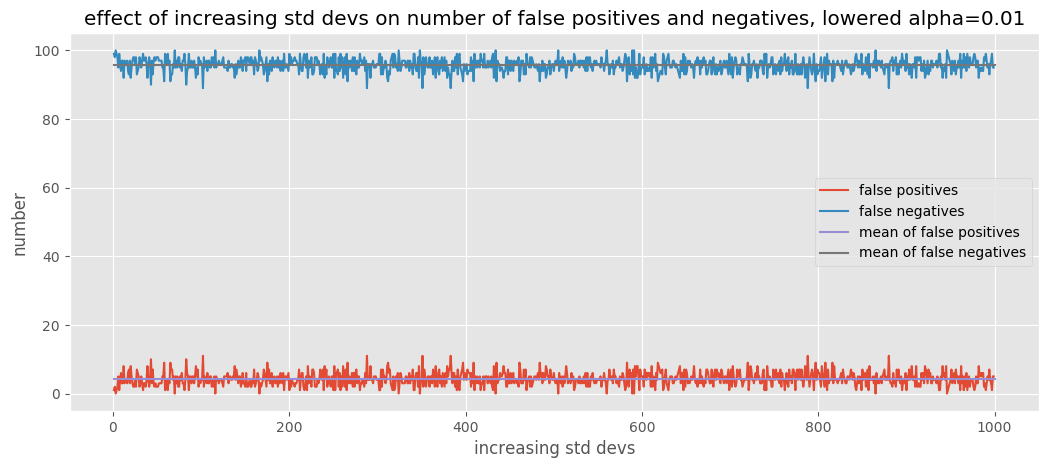

In [463]:
list_of_number_of_false_positives_varying_sigma_alpha_over_5 = []
list_of_number_of_false_negatives_varying_sigma_alpha_over_5 = []

for sigmaL in range(1,1000):
    throwaway234234 = ttestComp(mu_a=mu_3, sigma_a=sigma_3, mu_b=mu_3, sigma_b=sigmaL, size=(3,), number_of_tests=number_of_tests, alpha=0.01)
    list_of_number_of_false_positives_varying_sigma_alpha_over_5.append(throwaway234234[3])
    list_of_number_of_false_negatives_varying_sigma_alpha_over_5.append(throwaway234234[1])

#print(np.arange(1,201), list_of_number_of_false_negatives_varying_sigma)
    
plt.figure(19, figsize=(12.5, 5), dpi=100)

plt.plot(np.arange(1,1000),list_of_number_of_false_positives_varying_sigma_alpha_over_5, label="false positives")

plt.plot(np.arange(1,1000),list_of_number_of_false_negatives_varying_sigma_alpha_over_5, label="false negatives")

plt.plot([1,1000], [np.mean(list_of_number_of_false_positives_varying_sigma_alpha_over_5), np.mean(list_of_number_of_false_positives_varying_sigma_alpha_over_5)], label="mean of false positives")

plt.plot([1,1000], [np.mean(list_of_number_of_false_negatives_varying_sigma_alpha_over_5), np.mean(list_of_number_of_false_negatives_varying_sigma_alpha_over_5)], label="mean of false negatives")

plt.xlabel("increasing std devs")
plt.ylabel("number")
plt.legend()
plt.title("effect of increasing std devs on number of false positives and negatives, lowered alpha=0.01")

plt.show()

#### Question from (3f): How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

We see that the number of times the _p_-values are greater than alpha has increased and that the number of times the _p_-values are less than alpha have decreased. This is naturally obvious since by making alpha smaller, it makes it "easier" for _p_-values to be greater than a smaller number and "harder" for _p_-values to be smaller than a smaller number.

Considering the number of false positives, or the number of times we reject the null hypothesis incorrectly because the _p_-values are low when they should be high since the distributions are actually similar, decreases since we've made it harder for _p_-values to be small. However, since we've also made it easier for _p_-values to be bigger, we may also increase the amount of false negatives, the times in which we see a _p_-value greater than alpha even though the distributions are different. 

Since the goal of many tests is to reject the null, or find a low enough _p_-value, we must make it harder for us to produce low _p_-values by chance. By forcing the requirement for what it means to be a low _p_-value to be even lower, it makes it harder for us to reject the null just by purely taking more tests.

## (4) Shaffer et al implementation

In this excercise we're going to apply some basic concepts of statistics to a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment).

This data doesn't come from the original experiment, but rather a recent study that [applied a similar approach to study cancer cell resistance](https://www.nature.com/nature/journal/v546/n7658/abs/nature22794.html).

In [464]:
repOne = np.loadtxt("expt_rep1.csv")
repTwo = np.loadtxt("expt_rep2.csv")

#### (4a) First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

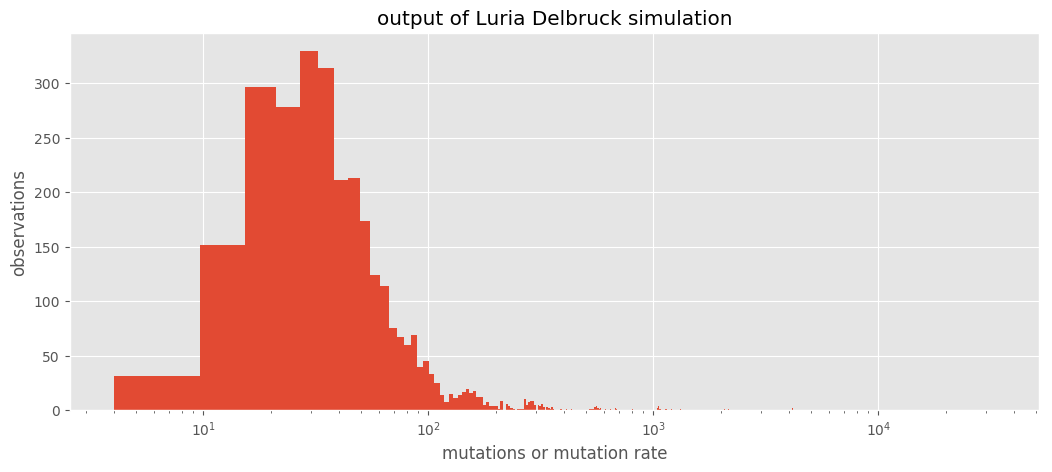

In [465]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for generationNumber in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells  # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts =  2*nMuts + newMuts # Previous mutants divide and add
        nCells = nCells - newMuts  # Non-resistant pop goes down by newMuts

    return nMuts

def CVofNRuns(number_of_runs, cultureSize, mutationRate):
    simLuriaDelbruck_output_holder = []
    for i in range (number_of_runs):
        simLuriaDelbruck_output_holder.append(simLuriaDelbruck(cultureSize, mutationRate))
        
    return(simLuriaDelbruck_output_holder)

model = CVofNRuns(3000, 120000, 0.0001)
        
plt.figure(20, figsize=(12.5, 5), dpi=100)

plt.hist(model, bins="auto", label="density or observations of mutation rate")
plt.title("output of Luria Delbruck simulation")
plt.xlabel("mutations or mutation rate")
plt.ylabel("observations")
plt.xscale('log') 

plt.show()

#### Question from (4a): What does the distribution of outcomes look like?

It looks / resembles a Poisson distribution.

#### (4b) Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test (`sp.stats.ks_2samp`). Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [466]:
rep_one_corrected = [x / np.mean(repOne) for x in repOne];
rep_two_corrected = [x / np.mean(repTwo) for x in repTwo];


print(sp.stats.ks_2samp(rep_one_corrected, rep_two_corrected))

Ks_2sampResult(statistic=0.25100240577385735, pvalue=0.19275155911638572)


#### Question from (4b): Are they consistent with one another?

The _p_-value is relatively small but not less than a significant factor like 0.05. The two experiment results are _similar_ and consistent with one another.

#### (4c) Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [467]:
print(sp.stats.ks_2samp(model, rep_one_corrected))
print(sp.stats.ks_2samp(model, rep_two_corrected))

Ks_2sampResult(statistic=1.0, pvalue=8.2192675486350948e-39)
Ks_2sampResult(statistic=1.0, pvalue=1.0657603180627499e-26)


#### Question from (4c): Are our results consistent with resistance arising through a Luria-Delbruck related process?

The _p_-values are extremely small indicating that the null hypothesis is rejected, and the two distributions are very different.

#### (4d) We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

I would hold one variable constant (keeping specific mutation rate constant), while running through values for the other (letting final number of cells vary). Then I would hold the other variable constant (final number of cells vary), while running through values for the other (letting specific mutation rate vary). 

I can also test if outputs from a different model based on changing those parameters are different based on their distributions. If the _p_-value tends to be lower than some alpha, then I know that changing the model parameters influence the results since our two distributions are different. On the other hand, if the two distributions are the same even though the model parameters are different, and the _p_-value tends to be high, then I know that changing the parameters does not influence our results.